# About This File

1. Title: Bank Marketing

Sources Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012

Past Usage:

The full dataset was described and analyzed in:

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

Relevant Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

There are two datasets: 1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010). 2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv. The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

The classification goal is to predict if the client will subscribe a term deposit (variable y).

Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

Number of Attributes: 16 + output attribute.

Attribute information:

For more information, read [Moro et al., 2011].

Input variables:

bank client data:
1 - age (numeric) 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) 4 - education (categorical: "unknown","secondary","primary","tertiary") 5 - default: has credit in default? (binary: "yes","no") 6 - balance: average yearly balance, in euros (numeric) 7 - housing: has housing loan? (binary: "yes","no") 8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 10 - day: last contact day of the month (numeric) 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 12 - duration: last contact duration, in seconds (numeric)

other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) 15 - previous: number of contacts performed before this campaign and for this client (numeric) 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

# Introduction

This Dataset is a big challenge for a Data Scientist. Besides being unbalanced data, further, we will realize that some datasets don't have a solution. And so, take more information and data become crucial to solve the Data Science problem.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import os




In [3]:
#Importing Dataset
df = pd.read_csv("bank_marketing.csv")

In [4]:
#Creating User Columns
df_user = pd.DataFrame(np.arange(0,len(df)), columns=['user'])
df = pd.concat([df_user, df], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       45211 non-null  int32 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int32(1), int64(7), object(10)
memory usage: 6.0+ MB


In [6]:
df.head(5)

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.tail()

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
df.columns.values

array(['user', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

# Data Analysis

In [9]:
df.describe()

,user,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.groupby('y').mean()

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\113242886.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('y').mean()


,user,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,21197.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,33228.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Note below how Dataset is unbalanced

In [11]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [12]:
countNo = len(df[df.y == 'no'])
countYes = len(df[df.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(df.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(df.y))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


# Verifying Null Values

<Axes: >

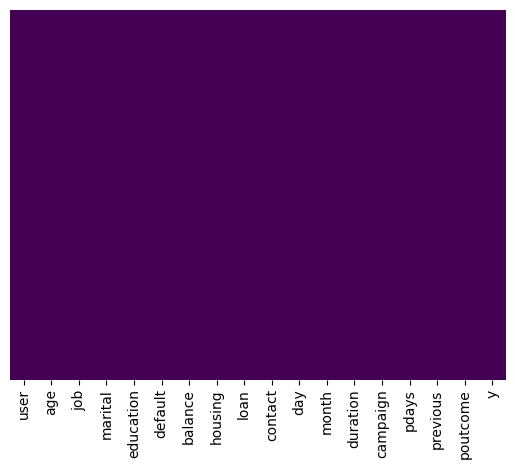

In [13]:
#Verifying null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
df.isna().any()

user         False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [15]:
df.isna().sum()

user         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Define X and y

In [16]:
#Define X and y
X = df.drop(['y','user','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']

# Get Dummies Values

In [17]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

# Dummy Trap

Dummy Variable Trap can influence negatively in our analyses. Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms, one variable can be predicted from the others. The best definition for Dummy Variable Trap [here](http://www.youtube.com/watch?v=qrWx3OjZL3o)


In [18]:
X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

# Visualising Data

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\3112296924.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.age[df.y=='yes'],
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\3112296924.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age[df.y=='no'],


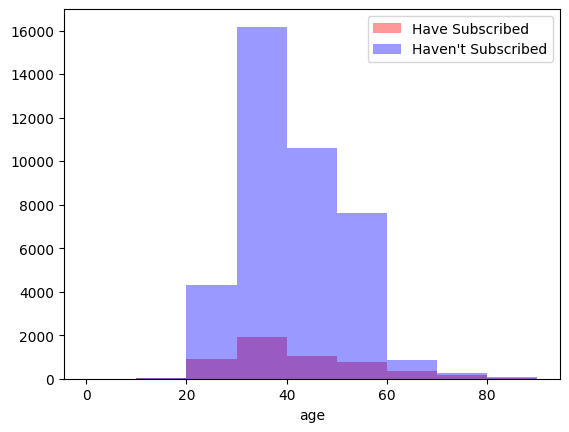

In [19]:
#Age group
bins = range(0, 100, 10)
ax = sns.distplot(df.age[df.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

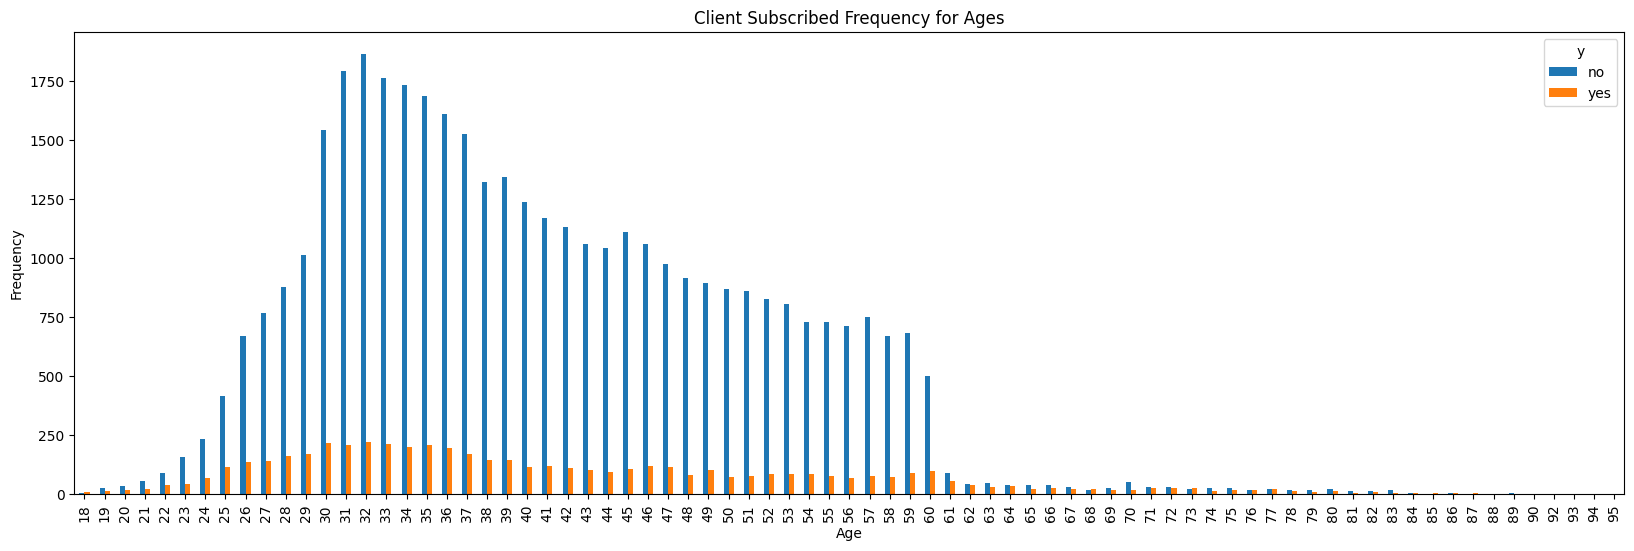

In [20]:
#Age
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

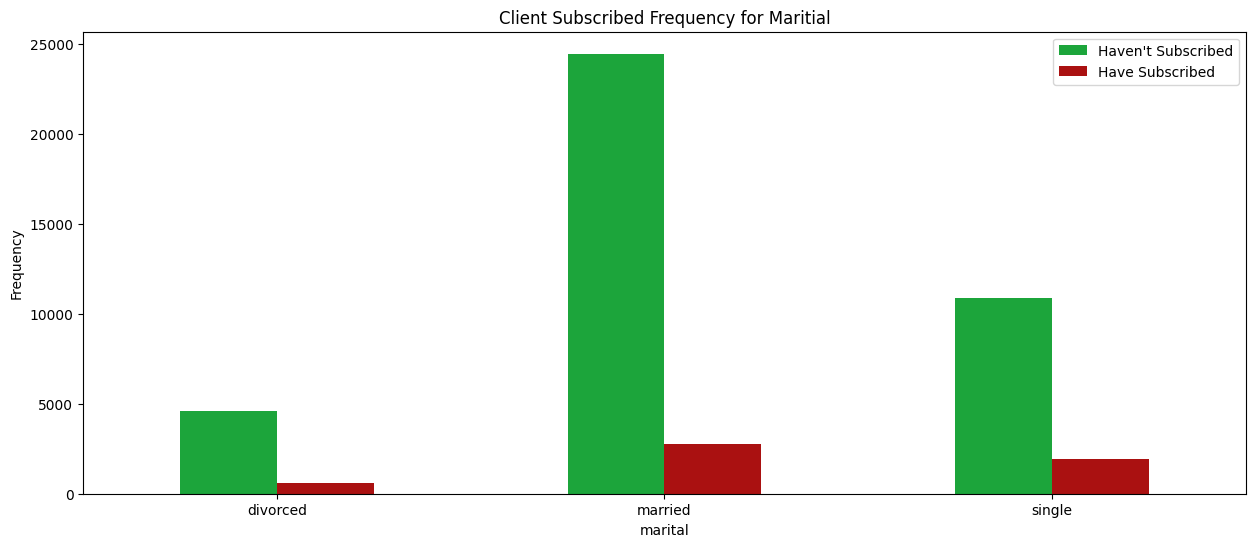

In [21]:
pd.crosstab(df.marital,df.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

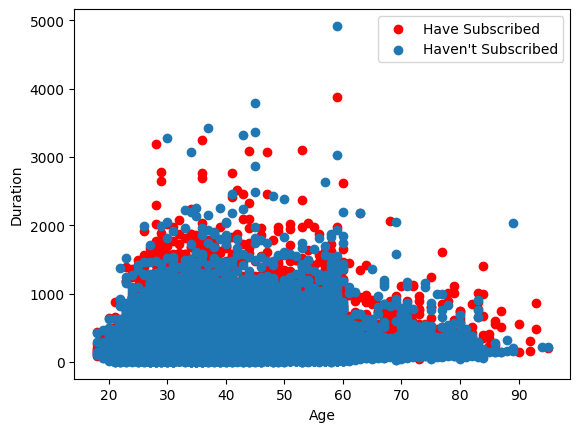

In [22]:
plt.scatter(x=df.age[df.y=='yes'], y=df.duration[(df.y=='yes')], c="red")
plt.scatter(x=df.age[df.y=='no'], y=df.duration[(df.y=='no')])
plt.legend(["Have Subscribed", "Haven't Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()


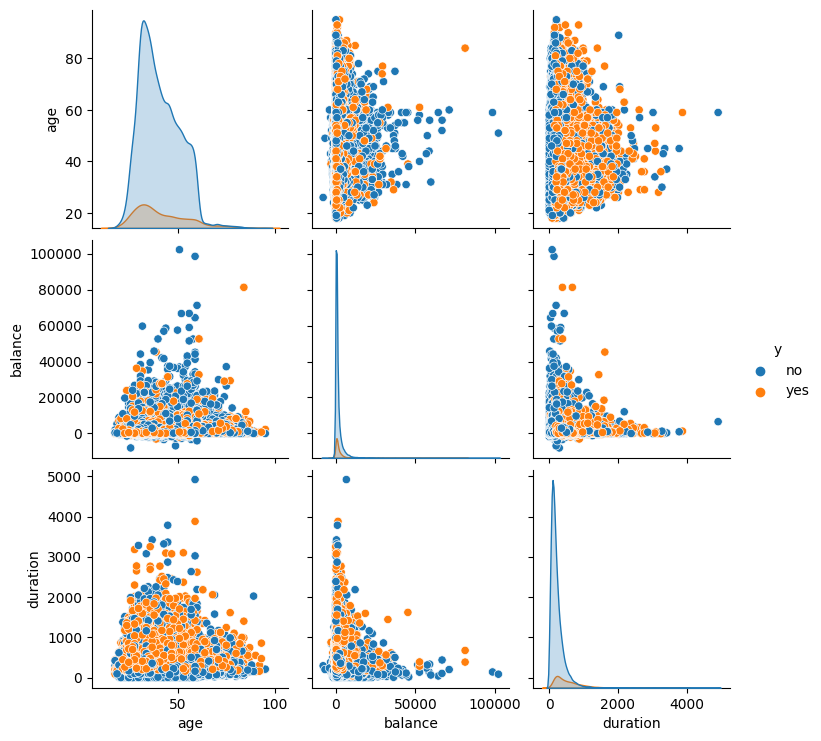

In [23]:
sns.pairplot(data=df, hue='y', vars= ['age', 'balance', 'duration'])

<Axes: xlabel='y', ylabel='count'>

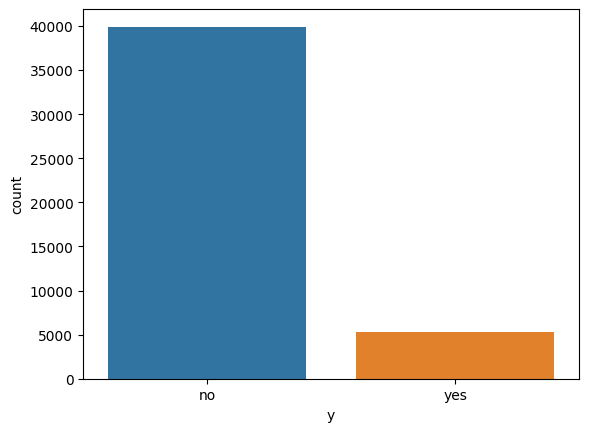

In [24]:
sns.countplot(x='y', data=df, label='Count')

<Axes: xlabel='age', ylabel='balance'>

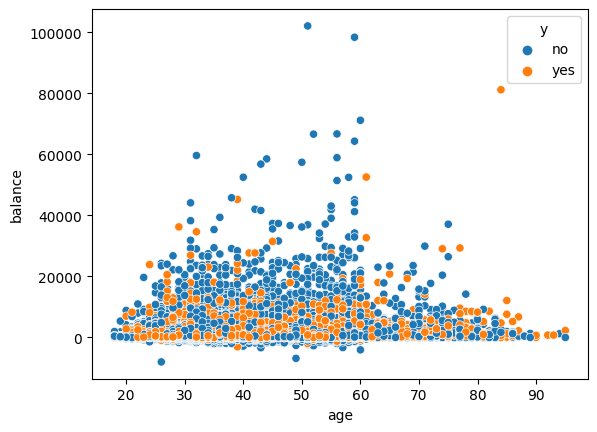

In [25]:
sns.scatterplot(x='age', y='balance',hue='y', data=df)

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\2274762985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap='viridis')


<Axes: >

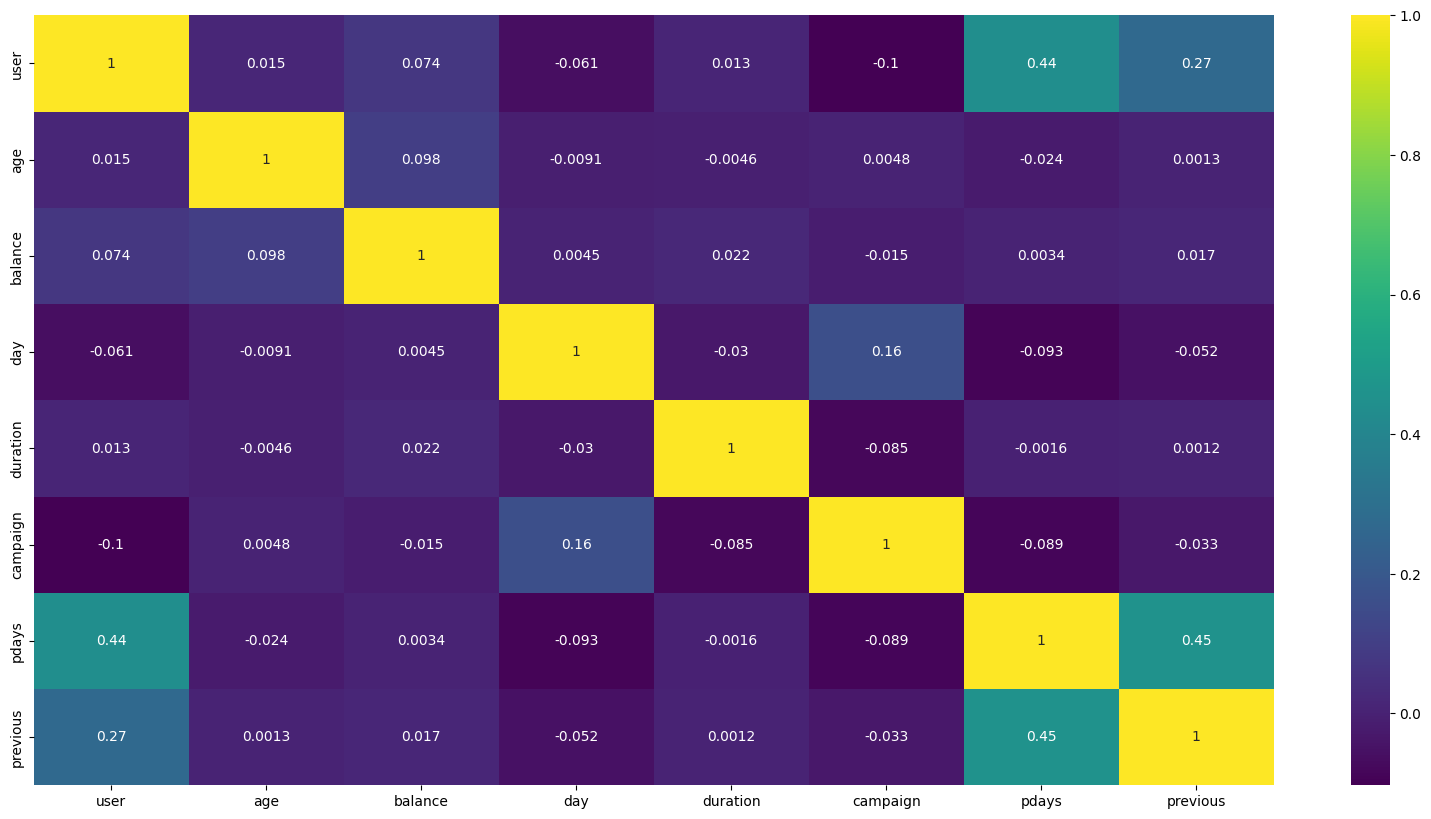

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\1531099499.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, bins = 20)


<Axes: xlabel='age', ylabel='Density'>

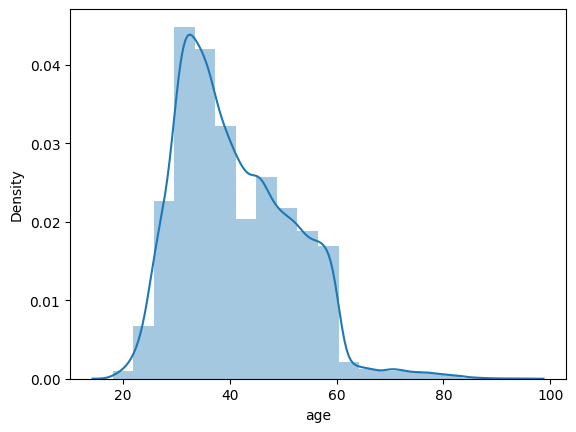

In [27]:
sns.distplot(df.age, bins = 20) 

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\3304258143.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.balance, bins = 20)


<Axes: xlabel='balance', ylabel='Density'>

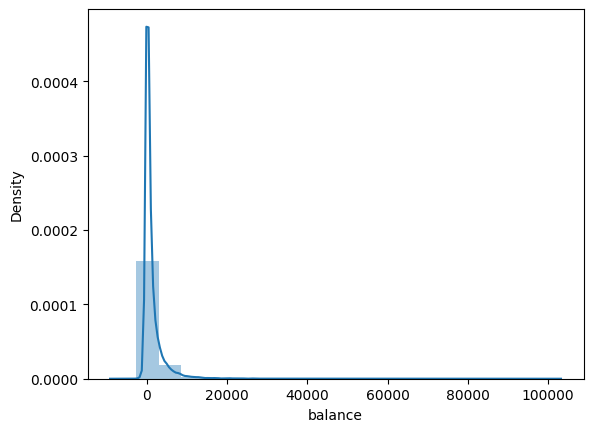

In [28]:
sns.distplot(df.balance, bins = 20) 

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\3372029532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration, bins = 20)


<Axes: xlabel='duration', ylabel='Density'>

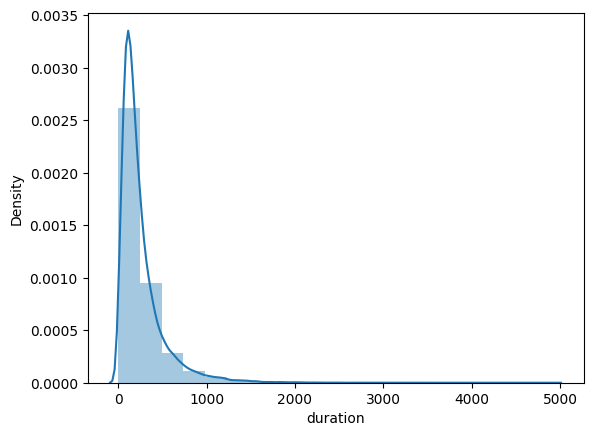

In [29]:
sns.distplot(df.duration, bins = 20) 

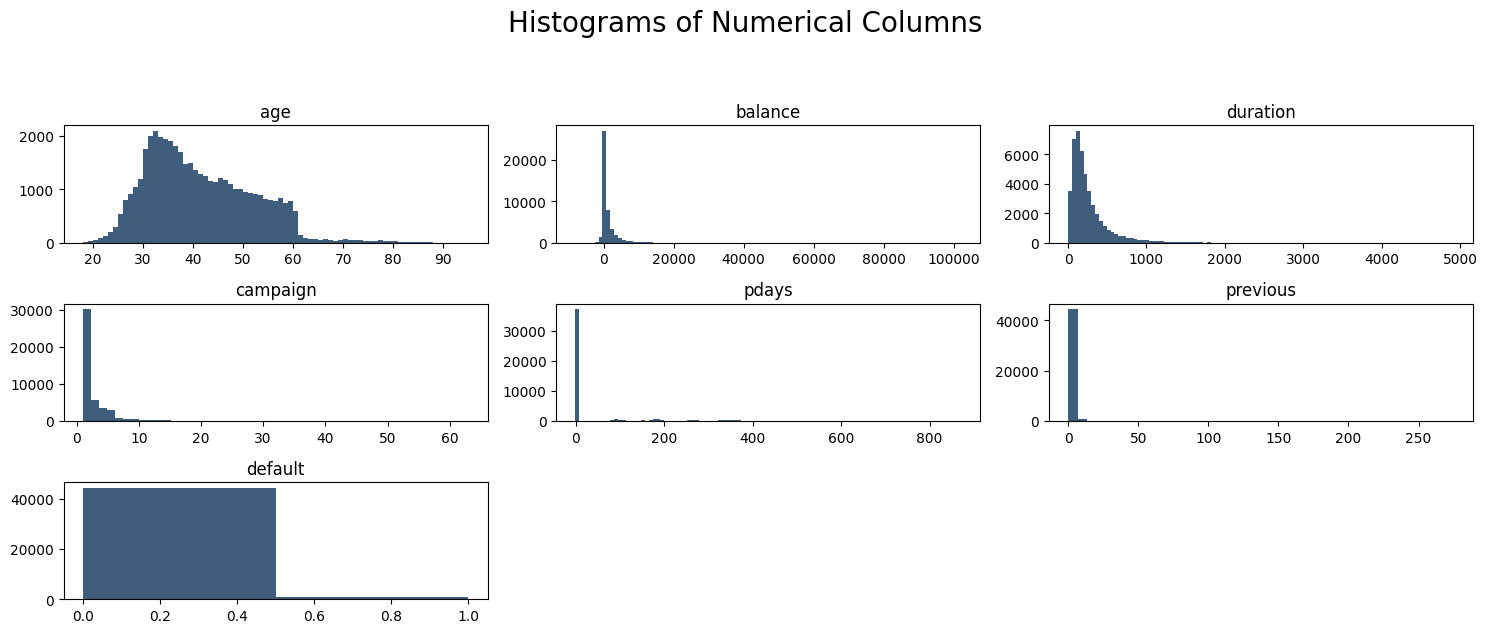

In [30]:
df2 = X
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<Axes: title={'center': 'Correlation with Y'}>

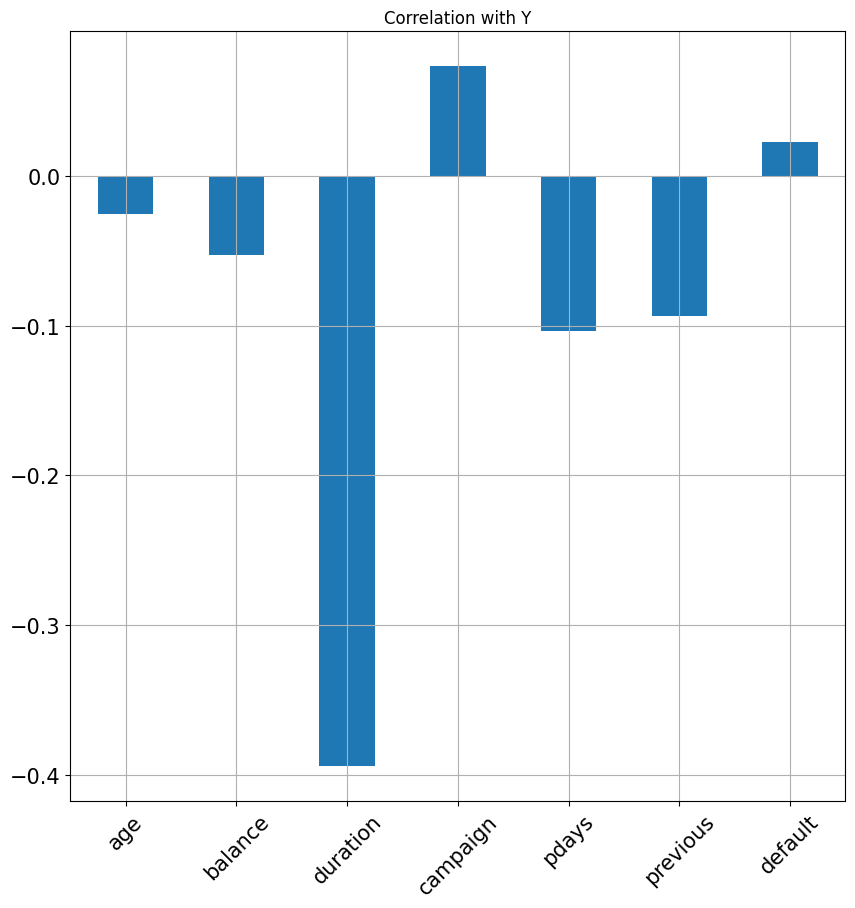

In [31]:
## Correlation with independent Variable 
df2.corrwith(y.y).plot.bar(
        figsize = (10, 10), title = "Correlation with Y", fontsize = 15,
        rot = 45, grid = True)

<Axes: >

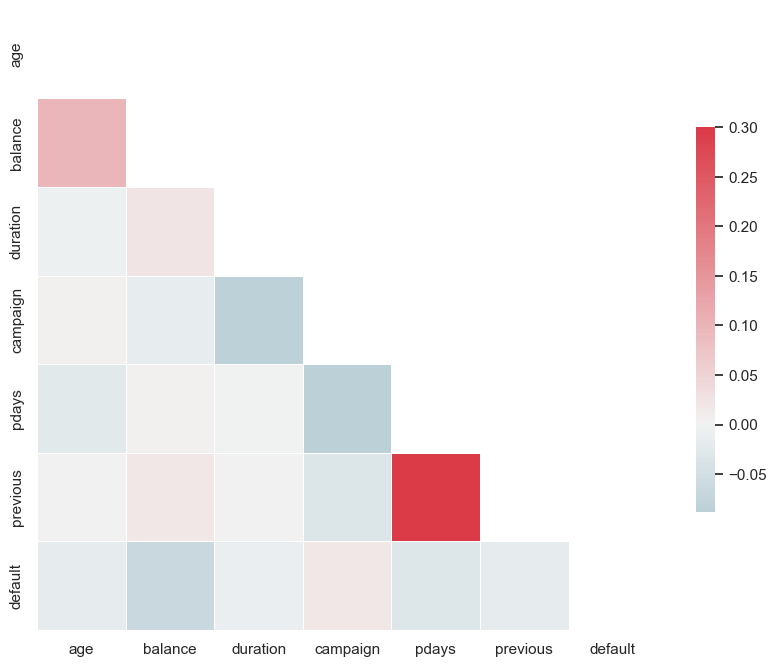

In [33]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

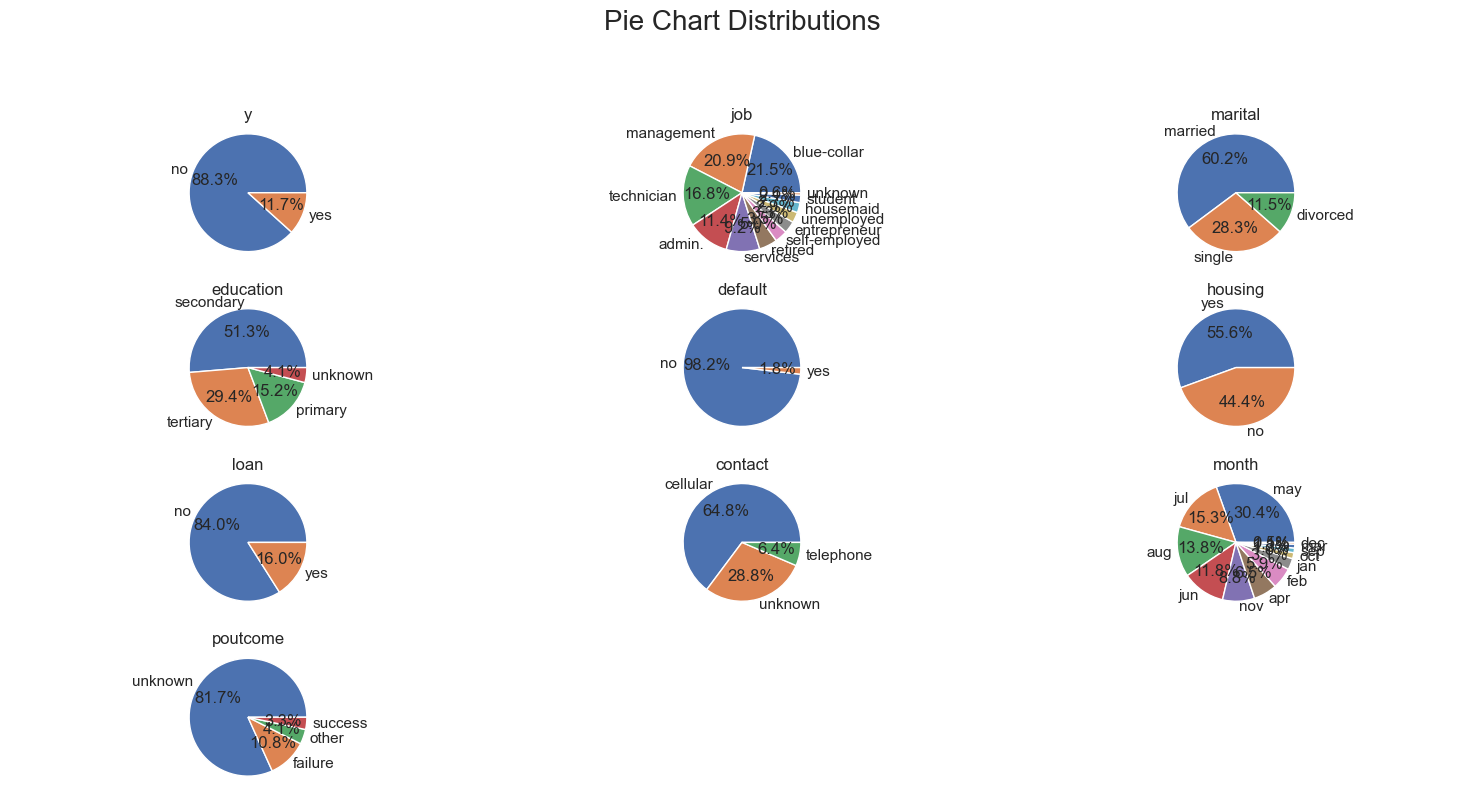

In [34]:
## Pie Plots
df.columns
df2 = df[['y','job','marital', 'education', 'default', 'housing','loan', 'contact',
             'month', 'poutcome'
                    ]]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
   
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Splitting the Dataset into Training Set and Test Set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [36]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 7) (9043, 7) (36168, 1) (9043, 1)


# Balancing the Traing Set

The Training Set is unbalanced. And so become necessary to organize it.

In [37]:
y_train['y'].value_counts()

1    31937
0     4231
Name: y, dtype: int64

In [38]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [39]:
y_train['y'].value_counts()

0    4231
1    4231
Name: y, dtype: int64

# Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

# Model Building
# Comparing Models

In [43]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
## K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\3589353506.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [45]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\753393444.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [46]:
## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf', probability= True)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\823104546.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [47]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Naive Bayes (Gaussian)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\3664883645.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [48]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

#Predicting the best set result
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\3104272825.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [49]:
## Random Forest Gini (n=100)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\1756351254.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\1756351254.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [50]:
## Random Forest Gini (n=200)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 200,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\2430447313.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\2430447313.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [51]:
## Random Forest Gini (n=300)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\2440386818.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\2440386818.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [52]:
## Random Forest Entropy (n=100)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\2692806700.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\2692806700.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [53]:
## Random Forest Entropy (n=200)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 200,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\435267626.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\435267626.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [54]:
## Random Forest Entropy (n=300)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\2144014056.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\2144014056.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


# Results

The SVM (Linear) was the most powerful method for our model as shown below.

In [55]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.794427,0.952437,0.807514,0.874009
1,K-Nearest Neighbors (minkowski),0.783921,0.964853,0.783845,0.864981
2,SVM (Linear),0.797302,0.952087,0.811271,0.876057
3,SVM (RBF),0.785580,0.967522,0.783469,0.865822
4,Naive Bayes (Gaussian),0.767334,0.950099,0.777332,0.855076
5,Decision Tree,0.706624,0.952324,0.702943,0.808848
6,Random Forest Gini (n=100),0.772310,0.968978,0.766688,0.856044
7,Random Forest Gini (n=200),0.776844,0.969178,0.771822,0.859314
8,Random Forest Gini (n=300),0.775738,0.969721,0.770069,0.858439
9,Random Forest Entropy (n=100),0.776844,0.969621,0.771446,0.859255


# Applying K-fold Validation

In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=10)
accuracies.mean()
accuracies.std()

C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vect

0.008872375459613994

In [57]:
print("SVM (Linear) Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM (Linear) Accuracy: 0.803 (+/- 0.018)


Test Data Accuracy: 0.7763


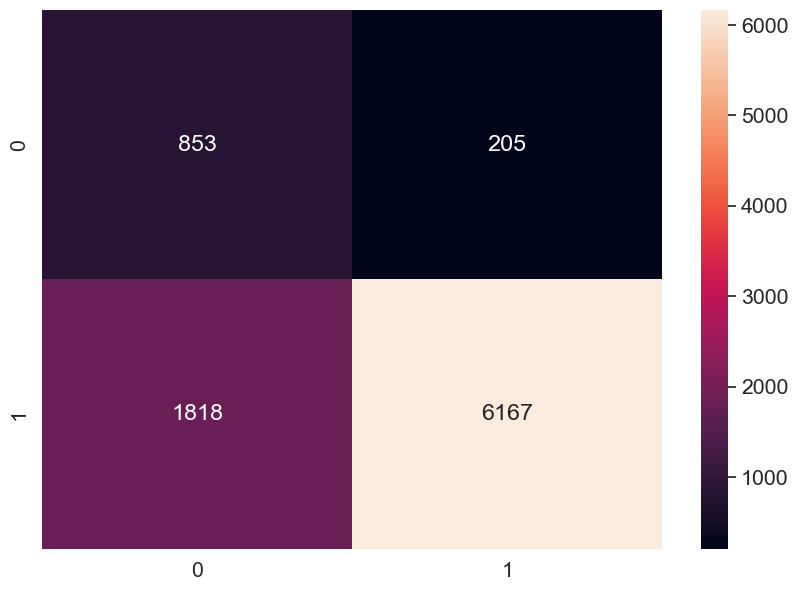

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

# Accuracy Paradox

Accuracy is not the best way to measure a perfomance of model. It´s because Accuracy Paradox. More about Accuracy Paradox [here](http://towardsdatascience.com/accuracy-paradox-897a69e2dd9b).

# Cumulative Accuracy Profile (CAP)

For figure out Accuracy Paradox, we will use the Cumulative Accuracy Profile (CAP). More about Cumulative Accuracy Profile (CAP) [here](http://en.wikipedia.org/wiki/Cumulative_accuracy_profile).

# Cumulative Accuracy Profile

In [59]:
#Plotting Cumulative Accuracy Profile (CAP)
y_pred_proba = classifier.predict_proba(X=X_test)
import matplotlib.pyplot as plt
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()

      0    1
0   1.0  1.0
1   1.0  1.0
2   1.0  1.0
3   1.0  1.0
4   1.0  1.0
5   1.0  1.0
6   1.0  1.0
7   1.0  1.0
8   1.0  1.0
9   1.0  1.0
10  1.0  1.0
11  1.0  1.0
12  1.0  1.0
13  1.0  1.0
14  1.0  1.0
15  1.0  1.0
16  1.0  1.0
17  1.0  1.0
18  1.0  1.0
19  1.0  1.0


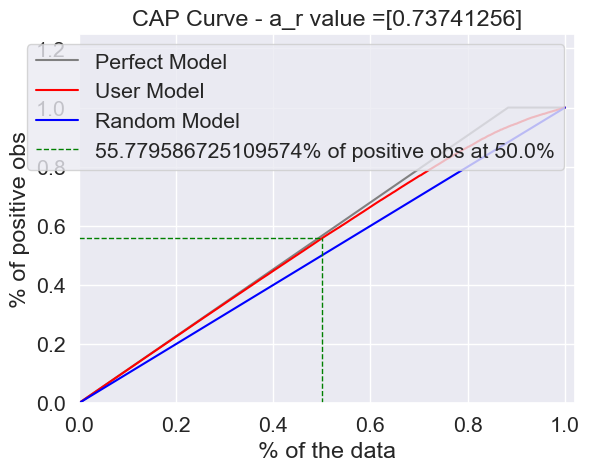

In [60]:
capcurve(y_test,y_pred_proba[:,1])

Note how the CAP result was much smaller than Accuracy result. CAP (55.25%) versus Accuracy (75.54%). Definitely the Accuracy Paradox influence negatively the model.

In [61]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

# Feature Selection
# Recursive Feature Elimination

For feature selection, we wil use the Recursive Feature Elimination (RFE). More about Recursive Feature Elimination (RFE) [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In [62]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Model to Test
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)

# Select Best X Features
rfe = RFE(classifier, n_features_to_select=None)
rfe = rfe.fit(X_train, y_train)

C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

In [63]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False  True False]
[5 3 1 1 2 1 4]


In [64]:
X_train.columns[rfe.support_]

Index(['duration', 'campaign', 'previous'], dtype='object')

In [65]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})    

C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\861830936.py:8: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros_like(corr, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [66]:
# Fitting Model to the Training Set
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM RFE (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\donghuna\AppData\Local\Temp\ipykernel_34604\1235652983.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


Taking off some features, our model decreases a little bit the Accuracy as shown below.

In [67]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.794427,0.952437,0.807514,0.874009
1,K-Nearest Neighbors (minkowski),0.783921,0.964853,0.783845,0.864981
2,SVM (Linear),0.797302,0.952087,0.811271,0.876057
3,SVM (RBF),0.785580,0.967522,0.783469,0.865822
4,Naive Bayes (Gaussian),0.767334,0.950099,0.777332,0.855076
5,Decision Tree,0.706624,0.952324,0.702943,0.808848
6,Random Forest Gini (n=100),0.772310,0.968978,0.766688,0.856044
7,Random Forest Gini (n=200),0.776844,0.969178,0.771822,0.859314
8,Random Forest Gini (n=300),0.775738,0.969721,0.770069,0.858439
9,Random Forest Entropy (n=100),0.776844,0.969621,0.771446,0.859255


<Axes: >

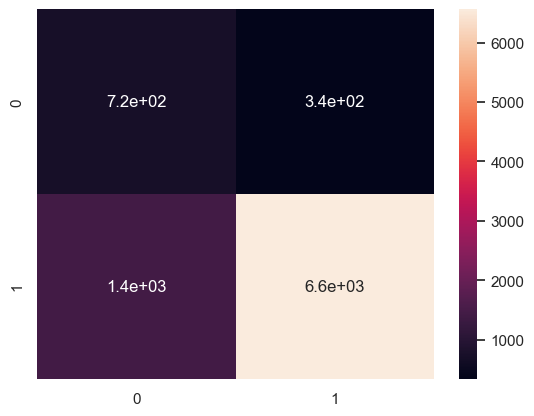

In [68]:
# Evaluating Results
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm, annot=True)

In [69]:
#Making the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.68      0.45      1058
           1       0.95      0.82      0.88      7985

    accuracy                           0.80      9043
   macro avg       0.64      0.75      0.66      9043
weighted avg       0.88      0.80      0.83      9043



In [70]:
# Applying k-Fold Cross Validation (RFE)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)

C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

In [71]:
print("SVM RFE (Linear) Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM RFE (Linear) Accuracy: 0.746 (+/- 0.044)


In [72]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)   

,features,coef
0,duration,-1.554991
1,campaign,0.192846
2,previous,-0.577518


      0         1
0   1.0  0.999983
1   1.0  0.994098
2   1.0  0.988838
3   1.0  0.988677
4   1.0  0.988461
5   1.0  0.985517
6   1.0  0.984526
7   1.0  0.984454
8   1.0  0.984006
9   1.0  0.982426
10  1.0  0.981922
11  1.0  0.981579
12  1.0  0.980692
13  1.0  0.980691
14  1.0  0.978388
15  1.0  0.976705
16  1.0  0.974539
17  1.0  0.973446
18  1.0  0.970849
19  1.0  0.969325


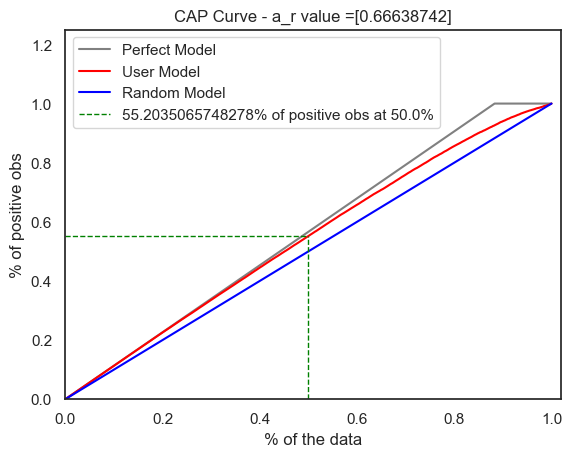

In [73]:
#CAP Curve
y_pred_proba = classifier.predict_proba(X=X_test[X_train.columns[rfe.support_]])
capcurve(y_test,y_pred_proba[:,1])   

In [74]:
### End of Model ####

# Formatting Final Results
user_identifier = df['user']
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted'] = y_pred
final_results = final_results[['user', 'y', 'predicted']].reset_index(drop=True)

In [75]:
final_results.head()

,user,y,predicted
0,43782,1.0,1
1,4237,1.0,1
2,36968,1.0,1
3,41044,1.0,1
4,37031,1.0,1


# Conclusion

As observed, the Bank Marketing Dataset is unbalanced. And so become tough to perform pretty well the model. Another issue was the Accuracy Paradox that provides a false Accuracy final result. Nevertheless, the Cumulative Accuracy Profile showed that our model is performing very worst. 
For this case, perhaps more data can help balance the dataset and trying to find one best final result. 
Perfomance of Model Accuracy: 79.54%
Cumulative Accuracy Profile: 55.25%